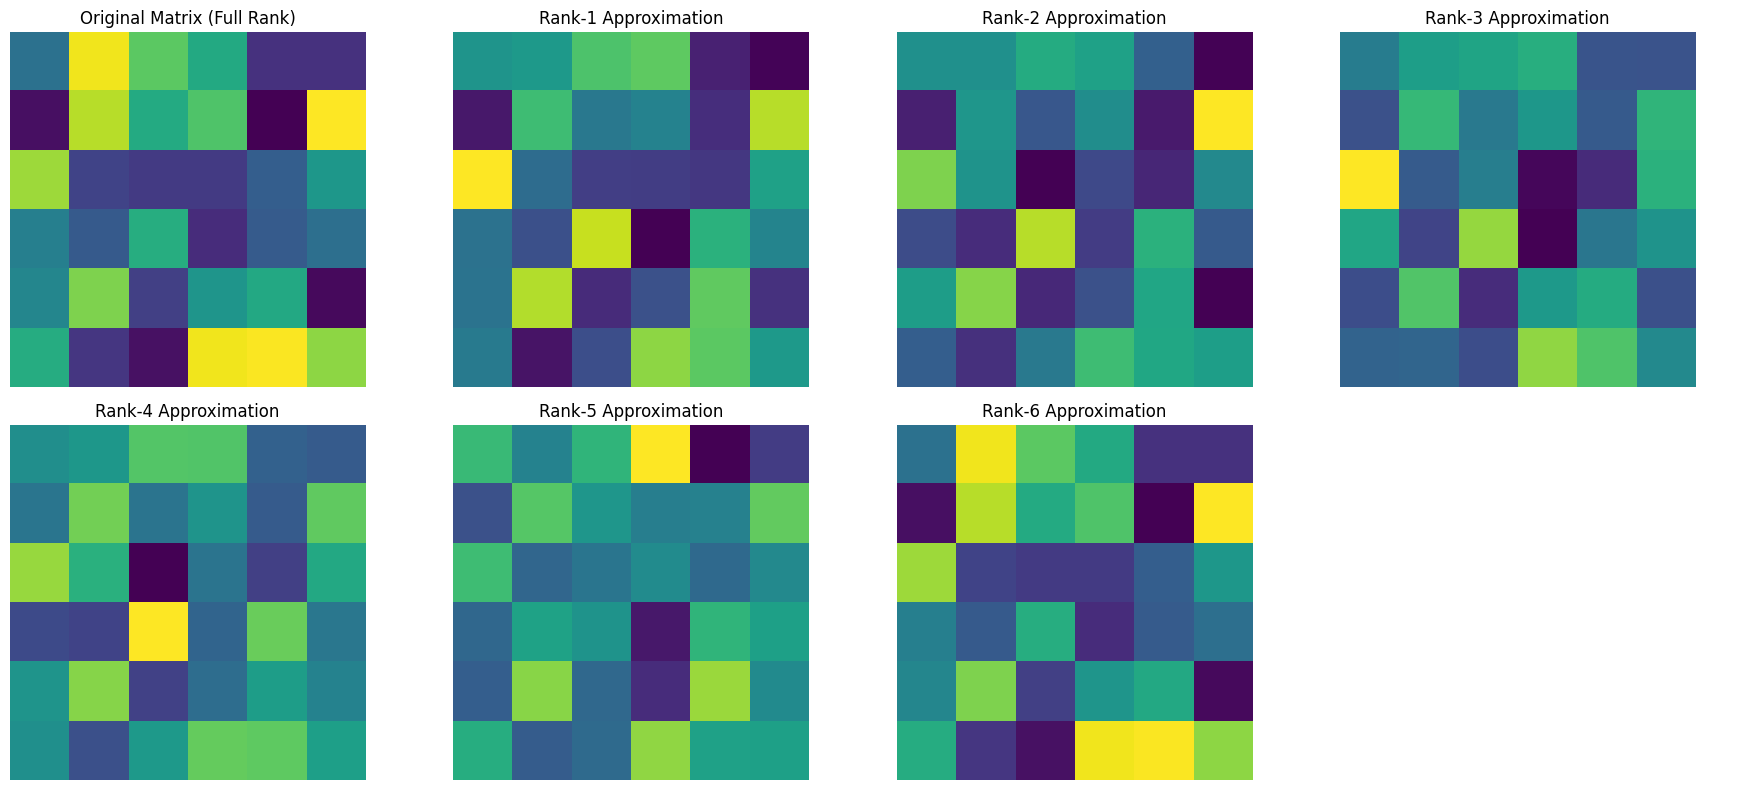

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

np.random.seed(42)
X = np.random.rand(6, 6)

# Perform full SVD
U, S, VT = svd(X)

# Function to reconstruct matrix with top-k components
def reconstruct_matrix(U, S, VT, k):
    S_k = np.zeros((U.shape[0], VT.shape[0]))
    np.fill_diagonal(S_k, S[:k])
    return U @ S_k @ VT

# Store approximations for visualization
approximations = [reconstruct_matrix(U, S, VT, k) for k in range(1, 7)]

# Plot original and rank-k approximations
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# Original matrix
axs[0, 0].imshow(X, cmap='viridis')
axs[0, 0].set_title('ooriginal matrix (full rank)')
axs[0, 0].axis('off')

# Display approximations
for i, ax in enumerate(axs.flat[1:], start=1):
    if i <= 6:
        ax.imshow(approximations[i-1], cmap='viridis')
        ax.set_title(f'aank-{i} approximation')
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
